In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../../data/df_te.csv")
df.sample(5)

,Precio,Tipo de Propiedad,Exterior,Habitaciones,Baños,Provincia,Mostrar Dirección,Tiene Video,Tiene Plano,Tiene 360,Ascensor,Tamaño_robust,Distancia_robust
159,740.0,681.418301,681.49481,689.131332,685.558824,697.296774,680.507463,691.440441,691.007843,706.864550,679.870971,-0.233333,-0.371830
294,700.0,681.418301,681.49481,689.131332,663.395530,584.006150,688.751480,678.348548,677.895197,675.286765,684.527919,1.266667,0.794484
336,750.0,681.418301,681.49481,671.204570,685.558824,697.296774,680.507463,678.348548,691.007843,675.286765,679.870971,-0.433333,0.106875
110,650.0,681.418301,681.49481,689.131332,685.558824,697.296774,680.507463,691.440441,691.007843,675.286765,679.870971,0.100000,1.258571
32,530.0,681.418301,681.49481,689.131332,685.558824,584.006150,680.507463,678.348548,677.895197,675.286765,679.870971,-0.300000,0.960852


In [3]:
x=df.drop("Precio",axis=1)
y=df[["Precio"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [4]:
model_LinearRegression=LinearRegression()
model_LinearRegression.fit(x_train,y_train)

LinearRegression()

In [5]:
y_test_pred=model_LinearRegression.predict(x_test)
y_train_pred=model_LinearRegression.predict(x_train)
sp.metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.544600,40.048800,2668.292100,51.655500
Test,0.412200,41.413100,2791.226500,52.832100
Diferenceia Train-Test,0.132400,-1.364300,-122.934400,-1.176600
Porcentaje diferencia (%),32.120300,-3.406600,-4.607200,-2.277800
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.069989,5.958862,399.358702,7.643171
Influencia dif media (%),0.019400,0.199600,17.985100,0.172100
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.067380,5.736754,384.473141,7.358282
Influencia dif mediana (%),0.018600,0.192200,17.314700,0.165700


- R² Score:
El modelo explica el 54.46% de la variabilidad en Train y 41.22% en Test, con una caída moderada, indicando margen de mejora.
- MAE:
Error absoluto promedio consistente 40.04 (Train) y 41.41 (Test), con una diferencia de -3.4%.
- MSE:
Error cuadrático medio similar en ambos conjuntos, con una diferencia de -4.6%, mostrando estabilidad.
- RMSE:
Error de raíz cuadrada cercano entre Train (51.66) y Test (52.83), con -2.3% de diferencia, pero afectado por errores grandes.
- RMSE-MAE:
Una diferencia constante de 11.42 entre RMSE y MAE sugiere algunos errores mayores, pero no extremos.

Esto indica que el modelo es razonablemente estable, pero con margen de mejora y reducir los errores.

In [6]:
# Asegurarse de que las variables sean unidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()
y_train = np.array(y_train).ravel()
y_train_pred = np.array(y_train_pred).ravel()

# Opcional: Convertir a series de Pandas
y_test = pd.Series(y_test)
y_test_pred = pd.Series(y_test_pred)
y_train = pd.Series(y_train)
y_train_pred = pd.Series(y_train_pred)

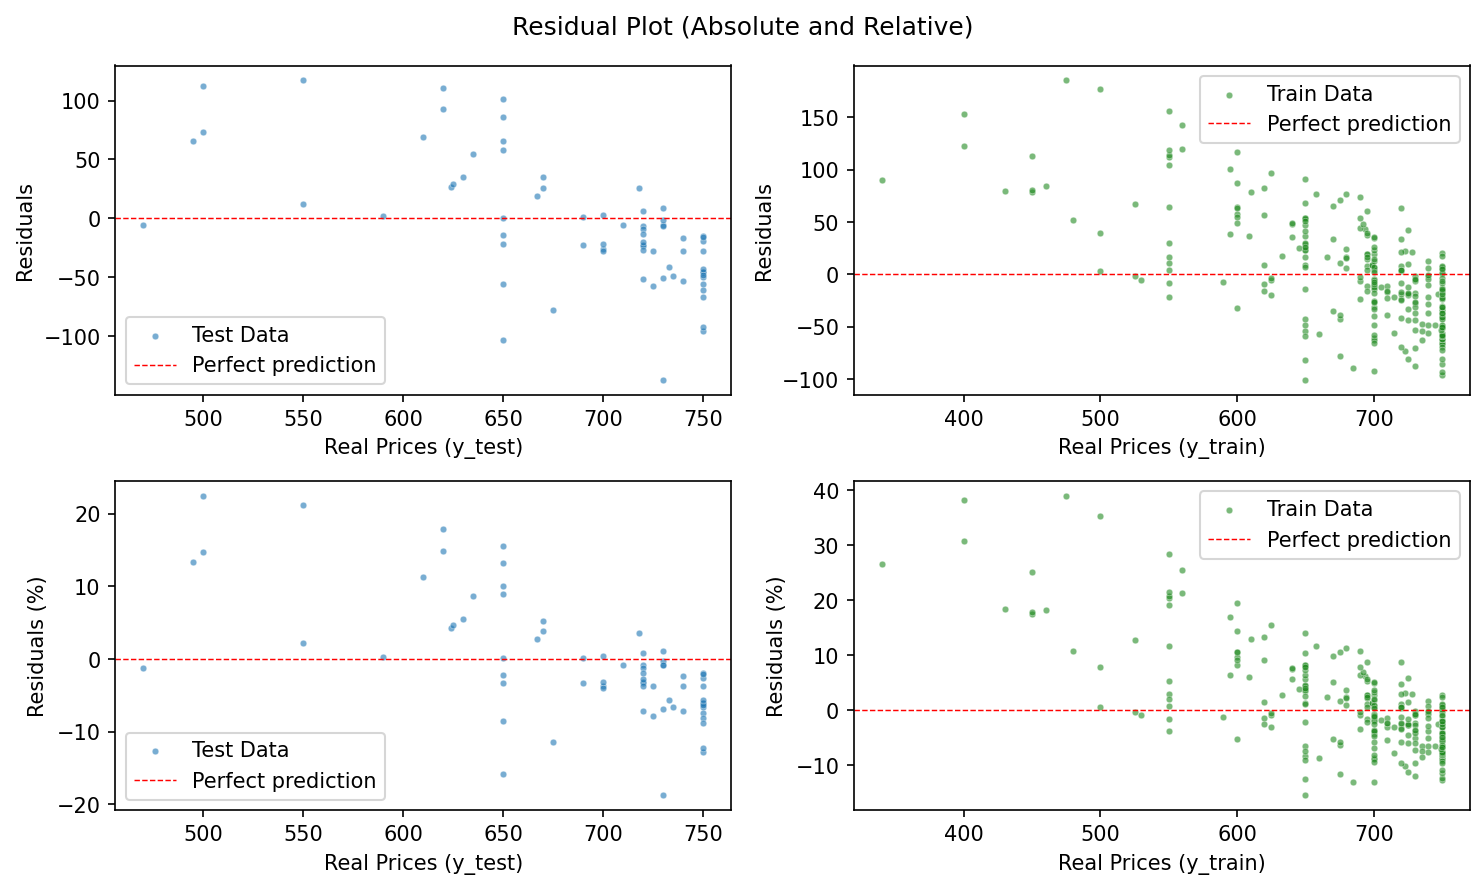

In [7]:
sp.plot_residuals(y_test, y_test_pred, y_train, y_train_pred)

#### Los gráficos muestran que los errores están bien distribuidos alrededor de 0, lo que indica que el modelo no tiene sesgos graves. Sin embargo, se nota mayor dificultad al predecir valores altos, y algunos errores son más grandes en esos casos. En general, el modelo funciona bien, pero podría mejorar con técnicas más complejas como Random Forest o Gradient Boosting. ¡Vamos bien!

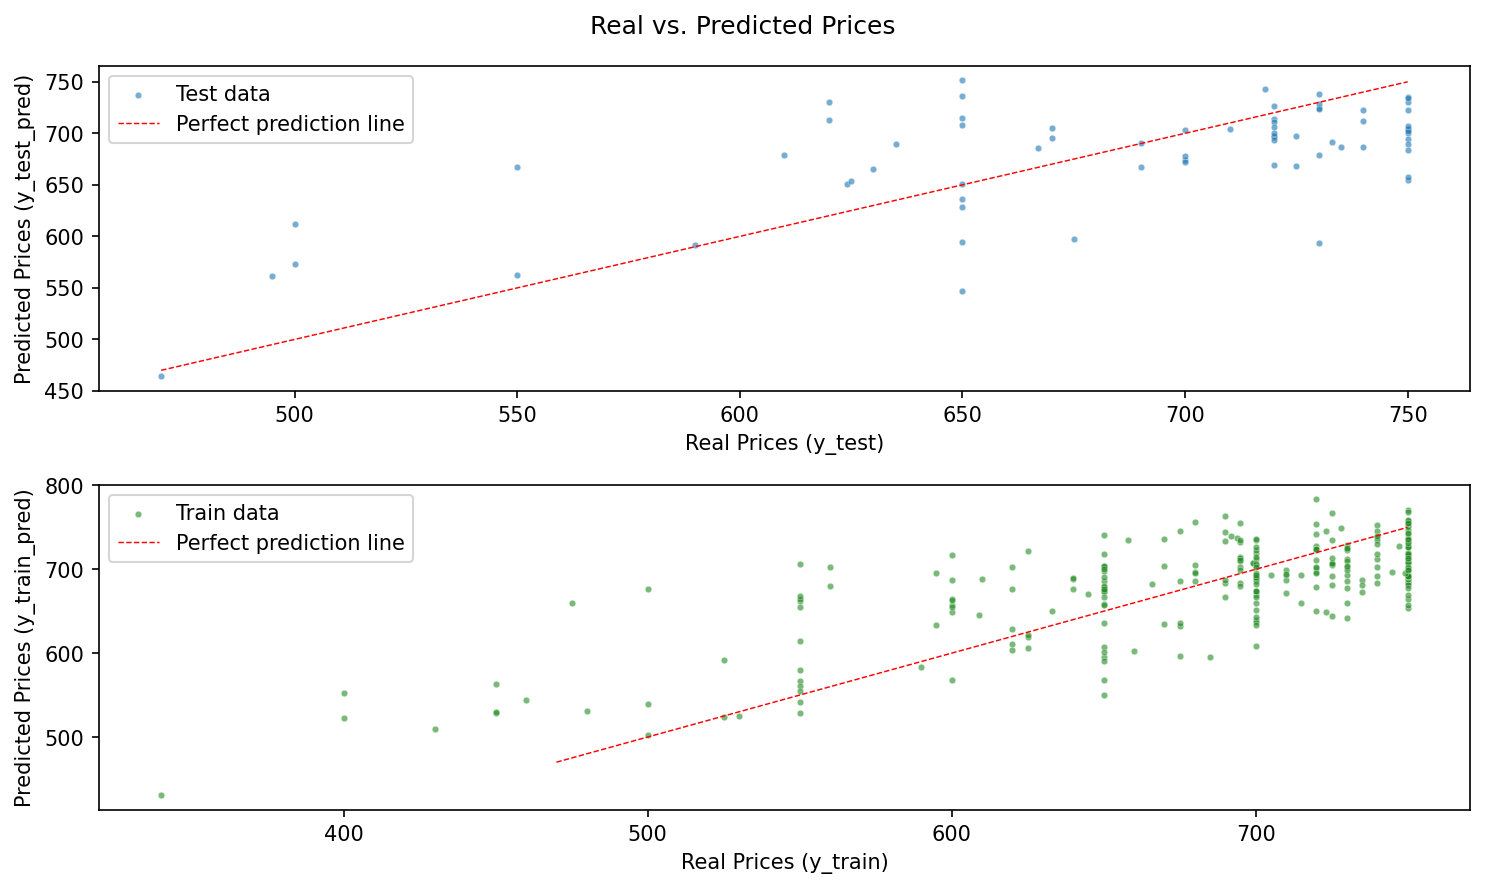

In [8]:
sp.plot_real_vs_predicted(y_test, y_test_pred, y_train, y_train_pred)

#### El modelo hace un trabajo decente, pero las predicciones son menos precisas para valores altos. Esto refuerza la idea de probar modelos más complejos como Random Forest o Gradient Boosting.

In [9]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_LinearRegression.pkl', 'wb') as file:
    pickle.dump(model_LinearRegression, file)